### Notebook to evaluate all the clustering approaches using F-score

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Load ground truth of similar test steps (to compute F-score)

In [8]:
# read excel files with manually clustered samples
manual_sample_dir = 'sample_manual_ground_truth/clusters/'
sample_files = os.listdir(manual_sample_dir)

In [9]:
manual_clusters_dict = {}
for sample in sample_files:
    sample_df = pd.read_excel(manual_sample_dir + sample)
    for index, row in sample_df.iterrows():
        cluster_id = row['cluster_id']
        step_id = row['step_id']
        if step_id in manual_clusters_dict:
            existing_list = manual_clusters_dict[step_id]
            existing_list.append(cluster_id)
            manual_clusters_dict[step_id] = existing_list
        else:
            manual_clusters_dict[step_id] = [cluster_id]

In [10]:
print("Number of test step samples which were manually clustered: ", len(manual_clusters_dict))

Number of test step samples which were manually clustered:  394


In [11]:
test_steps_to_evaluate_list = list(manual_clusters_dict.keys())

In [10]:
list_cluster_ids = list()
for key in manual_clusters_dict:
    list_cluster_ids.append(manual_clusters_dict[key][0])

In [11]:
cluster_dict = {}
for key in manual_clusters_dict:
    clusterid = manual_clusters_dict[key][0]
    if clusterid not in newdict:
        cluster_dict[clusterid] = [key]
    else:
        existing_list = newdict[clusterid]
        existing_list.append(key)
        cluster_dict[clusterid] = existing_list

In [17]:
# Get number of steps in clusters
list_number_elements = list()
for key in cluster_dict:
    number_elements = len(cluster_dict[key])
    list_number_elements.append(number_elements)

<Figure size 432x288 with 0 Axes>

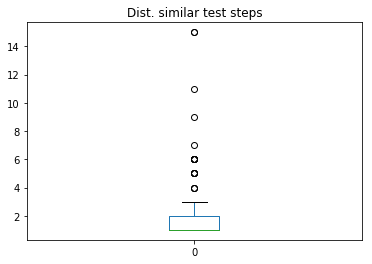

                0
count  213.000000
mean     1.849765
std      1.941591
min      1.000000
25%      1.000000
50%      1.000000
75%      2.000000
max     15.000000



In [19]:
# Plot distribution of steps in clusters (for the ground truth)
plt.figure()
pd.DataFrame(list_number_elements).plot.box()
plt.title('Dist. similar test steps')
plt.show()
print(pd.DataFrame(list_number_elements).describe(), end='\n\n')

In [2]:
# Set directory with experiment results
experiment_results_dir = 'experiments/'

### Evaluate approach 1 (hierarchical clustering)

In [11]:
approach_1_dir = experiment_results_dir + 'results_approach_1/'

In [12]:
appr_clusters_dict = {}
cluster_file = open(approach_1_dir + 'appr_1_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [13]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [14]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [15]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [16]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.9373695198329853
Recall =  0.7918871252204586


In [17]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8585086042065009


### Evaluate approach 1 (K-means)

In [27]:
approach_1_kmeans_dir = experiment_results_dir + 'results_approach_1_kmeans/'

In [28]:
appr_clusters_dict = {}
cluster_file = open(approach_1_kmeans_dir + 'appr_1_kmeans_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [29]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [30]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [31]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [32]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.9423868312757202
Recall =  0.8077601410934744


In [33]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8698955365622032


### Evaluate approach 2 (hierarchical clustering)

In [50]:
approach_2_dir = experiment_results_dir + 'results_approach_2/'

In [51]:
appr_clusters_dict = {}
cluster_file = open(approach_2_dir + 'appr_2_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [52]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [53]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [54]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [55]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.8956692913385826
Recall =  0.8024691358024691


In [56]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8465116279069766


### Evaluate approach 2 (K-means)

In [58]:
approach_2_kmeans_dir = experiment_results_dir + 'results_approach_2_kmeans/'

In [59]:
appr_clusters_dict = {}
cluster_file = open(approach_2_kmeans_dir + 'appr_2_kmeans_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [60]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [61]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [62]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [63]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.9114688128772636
Recall =  0.798941798941799


In [64]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8515037593984962


### Evaluate approach 2 (hierarchical clustering) - Domain-adaptive pre-trained

In [66]:
approach_2_custom_dir = experiment_results_dir + 'results_approach_2_custom/'

In [67]:
appr_clusters_dict = {}
cluster_file = open(approach_2_custom_dir + 'appr_2_custom_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [68]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [69]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [70]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [71]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.9389473684210526
Recall =  0.7865961199294532


In [72]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8560460652591171


### Evaluate approach 2 (K-means) - Domain-adaptive pre-trained

In [74]:
approach_2_custom_kmeans_dir = experiment_results_dir + 'results_approach_2_custom_kmeans/'

In [75]:
appr_clusters_dict = {}
cluster_file = open(approach_2_custom_kmeans_dir + 'appr_2_custom_kmeans_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [76]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [77]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [78]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [79]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.9429175475687104
Recall =  0.7865961199294532


In [80]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8576923076923076


### Evaluate approach 3 (hierarchical clustering)

In [82]:
approach_3_dir = experiment_results_dir + 'results_approach_3/'

In [83]:
appr_clusters_dict = {}
cluster_file = open(approach_3_dir + 'appr_3_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [84]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [85]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [86]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [87]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.9466950959488273
Recall =  0.783068783068783


In [88]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.857142857142857


### Evaluate approach 3 (K-means)

In [90]:
approach_3_kmeans_dir = experiment_results_dir + 'results_approach_3_kmeans/'

In [91]:
appr_clusters_dict = {}
cluster_file = open(approach_3_kmeans_dir + 'appr_3_kmeans_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [92]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [93]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [94]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [95]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.9509594882729211
Recall =  0.7865961199294532


In [96]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8610038610038611


### Evaluate approach 4 (hierarchical clustering)

In [98]:
approach_4_dir = experiment_results_dir + 'results_approach_4/'

In [99]:
appr_clusters_dict = {}
cluster_file = open(approach_4_dir + 'appr_4_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [100]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [101]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [102]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [103]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.9026369168356998
Recall =  0.7848324514991182


In [104]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.839622641509434


### Evaluate approach 4 (K-means)

In [106]:
approach_4_kmeans_dir = experiment_results_dir + 'results_approach_4_kmeans/'

In [107]:
appr_clusters_dict = {}
cluster_file = open(approach_4_kmeans_dir + 'appr_4_kmeans_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [108]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [109]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [110]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [111]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.8691588785046729
Recall =  0.8201058201058201


In [112]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8439201451905626


### Evaluate approach 5 (hierarhical clustering)

In [114]:
approach_5_dir = experiment_results_dir + 'results_approach_5/'

In [115]:
appr_clusters_dict = {}
cluster_file = open(approach_5_dir + 'appr_5_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [116]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [117]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [118]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [119]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.9189723320158103
Recall =  0.8201058201058201


In [120]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8667287977632805


### Evaluate approach 5 (K-means)

In [122]:
approach_5_kmeans_dir = experiment_results_dir + 'results_approach_5_kmeans/'

In [123]:
appr_clusters_dict = {}
cluster_file = open(approach_5_kmeans_dir + 'appr_5_kmeans_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [124]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [125]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [126]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [127]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  0.918
Recall =  0.8095238095238095


In [128]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.8603561387066543


### Evaluate Baseline 1 - Exact same steps

In [130]:
baseline_1_dir = experiment_results_dir + 'baseline_1/'

In [131]:
appr_clusters_dict = {}
cluster_file = open(baseline_1_dir + 'baseline_1_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id

In [132]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [133]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [134]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        # true positive case
        if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            TP += 1
            
        # false positive case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
            FP += 1
            
        # false negative case
        elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            FN += 1
            
        # true negative case
        elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
            TN += 1

In [135]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

Precision =  1.0
Recall =  0.5432098765432098


In [136]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)

F-score =  0.704


### Evaluate Baseline 2 - WMD = 0

In [137]:
baseline_2_dir = experiment_results_dir + 'baseline_2/'

In [138]:
appr_clusters_dict = {}
cluster_file = open(baseline_2_dir + 'baseline_2_cluster_labels.txt')
for line in cluster_file:
    full_line = line.split()
    cluster_id = int(full_line[0].replace('[', '').replace(']', '').replace(':', ''))
    step_id_list = full_line[1].split(',')
    for step_id in step_id_list:
        appr_clusters_dict[int(step_id)] = cluster_id
cluster_file.close()

In [139]:
print("Number of test steps which were clustered by the approach: ", len(appr_clusters_dict))

Number of test steps which were clustered by the approach:  15644


In [140]:
# Declare and initialize variables to compute F-score
TP = 0
FP = 0
TN = 0
FN = 0

In [141]:
# Iterate through list of steps to evaluate
for i in range(len(test_steps_to_evaluate_list)-1):
    for j in range(i+1, len(test_steps_to_evaluate_list)):
        step_id_1 = test_steps_to_evaluate_list[i]
        step_id_2 = test_steps_to_evaluate_list[j]
        
        try:
            # true positive case
            if (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
                TP += 1

            # false positive case
            elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] == appr_clusters_dict[step_id_2]):
                FP += 1

            # false negative case
            elif (manual_clusters_dict[step_id_1] == manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
                FN += 1

            # true negative case
            elif (manual_clusters_dict[step_id_1] != manual_clusters_dict[step_id_2]) and (appr_clusters_dict[step_id_1] != appr_clusters_dict[step_id_2]):
                TN += 1
        except:
            continue

In [ ]:
precision = TP / (TP + FP)
recall = TP / (TP + FN)
print("Precision = ", precision)
print("Recall = ", recall)

In [ ]:
f_score = (2 * precision * recall) / (precision + recall)
print("F-score = ", f_score)